In [88]:
import numpy as np
import pandas as pd
import glob
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [89]:
file_prefix='done_bug_'
file_pattern = os.path.join("./data/jira_trem/", f'{file_prefix}*.csv')
csv_files = glob.glob(file_pattern)

dataframes = []
for file in csv_files:
    dataframes.append(pd.read_csv(file))
df = pd.concat(dataframes, ignore_index=True)
df.head()

,Summary,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project lead id,Project description,Project url,Priority,Resolution,Assignee,Assignee Id,Reporter,Reporter Id,Creator,Creator Id,Created,Updated,Last Viewed,Resolved,Affects versions,Affects versions.1,Affects versions.2,Affects versions.3,Fix versions,Fix versions.1,Components,Due date,Votes,Labels,Labels.1,Labels.2,Labels.3,Labels.4,Labels.5,Description,Environment,Watchers,Watchers.1,Watchers.2,Watchers.3,Watchers.4,Watchers.5,Watchers.6,Watchers.7,Watchers Id,...,Log Work.26,Log Work.27,Log Work.28,Log Work.29,Log Work.30,Log Work.31,Log Work.32,Log Work.33,Log Work.34,Log Work.35,Log Work.36,Log Work.37,Log Work.38,Log Work.39,Log Work.40,Log Work.41,Log Work.42,Log Work.43,Log Work.44,Log Work.45,Log Work.46,Log Work.47,Log Work.48,Outward issue link (Blocks).2,Outward issue link (Parent-Child),Outward issue link (Parent-Child).1,Outward issue link (Parent-Child).2,Outward issue link (Parent-Child).3,Inward issue link (Test),Attachment.22,Attachment.23,Attachment.24,Attachment.25,Attachment.26,Attachment.27,Attachment.28,Attachment.29,Attachment.30,Attachment.31,Attachment.32,Attachment.33,Sprint.16,Sprint.17,Sprint.18,Sprint.19,Sprint.20,Inward issue link (Blocks).1,Inward issue link (Blocks).2,Inward issue link (Problem/Incident).2,Inward issue link (Problem/Incident).3
0,5743593 - [PROD-Mes16][K03][Production Workben...,SAME-13057,1164713,Bug,Done,SAME,Sanmina - MES101,software,Corina Mustata,611cedeb41ff95006a8f1fad,NaN,NaN,Medium,Duplicate,Adrian Dragusanu,62c68f981bb561c337962f88,sanmina,5ee212569c72bd0ac05bbd01,sanmina,5ee212569c72bd0ac05bbd01,12/Aug/24 4:59 PM,13/Aug/24 2:12 PM,16/Aug/24 8:53 AM,13/Aug/24 2:11 PM,1.4.6 [M],NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,rbc,NaN,NaN,NaN,NaN,NaN,Created by Luis\n\n----\n\nHello [~accountid:7...,NaN,Octavian Voloaca,sanmina,NaN,NaN,NaN,NaN,NaN,NaN,5e1309decbf1830daa9ce746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5737504 - [PROD] [E34][MES15 - MES16] [Routes]...,SAME-13029,1162316,Bug,Done,SAME,Sanmina - MES101,software,Corina Mustata,611cedeb41ff95006a8f1fad,NaN,NaN,Medium,Functions as Designed,NaN,NaN,sanmina,5ee212569c72bd0ac05bbd01,sanmina,5ee212569c72bd0ac05bbd01,01/Aug/24 4:28 PM,08/Aug/24 10:40 AM,16/Aug/24 9:01 AM,06/Aug/24 1:39 PM,1.4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,rbc,NaN,NaN,NaN,NaN,NaN,Ticket created by Luis\n\nSource: [MPDI-6466|h...,NaN,Adrian Dragusanu,sanmina,NaN,NaN,NaN,NaN,NaN,NaN,62c68f981bb561c337962f88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[CNUNV] [MES16]ORDER SEQUENCING - Serial list ...,SAME-13024,1161845,Bug,Done,SAME,Sanmina - MES101,software,Corina Mustata,611cedeb41ff95006a8f1fad,NaN,NaN,Medium,Resolved,Octavian Voloaca,5e1309decbf1830daa9ce746,sanmina,5ee212569c72bd0ac05bbd01,sanmina,5ee212569c72bd0ac05bbd01,31/Jul/24 1:04 PM,12/Aug/24 10:37 AM,15/Aug/24 1:33 PM,06/Aug/24 1:53 PM,1.4.5,NaN,NaN,NaN,1.4.7,NaN,NaN,NaN,0,rbc,NaN,NaN,NaN,NaN,NaN,"Hi team,\n\nThere is a problem with the ORDER ...",NaN,Octavian Voloaca,sanmina,NaN,NaN,NaN,NaN,NaN,NaN,5e1309decbf1830daa9ce746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[BE] Some logs from user-administration servic...,SAME-12999,1160210,Bug,Done,SAME,Sanmina - MES101,software,Corina Mustata,611cedeb41ff95006a8f1fad,NaN,NaN,Medium,Resolved,sergei.nikolaev,712020:5e6872a2-61e9-4f04-9779-238a5e6ba048,Alexandru Olteanu,557058:1a1ce1d5-7204-4e82-8c91-054565eda5b4,Alexandru Olteanu,557058:1a1ce1d5-7204-4e82-8c91-054565eda5b4,24/Jul/24 1:13

In [90]:
# 合并以 'Labels' 开头的字段为数组形式
label_columns = [col for col in df.columns if col.startswith('Labels')]
df['Label_List'] = df[label_columns].apply(lambda row: [x for x in row if pd.notna(x) and x != ''], axis=1)

comment_fields = [col for col in df.columns if col.startswith('Comment')]
df['Comments'] = df[comment_fields].apply(
    lambda row: '\n'.join(row.dropna().astype(str)) if row.notna().any() else '',
    axis=1
)

watcher_id_fields = [col for col in df.columns if col.startswith('Watchers Id')]
df['WatcherIds'] = df[watcher_id_fields].apply(
    lambda row: ','.join(row[row != 'unknown'].dropna().astype(str)) if row.notna().any() and (row != 'unknown').any() else '',
    axis=1
)

In [91]:
df.shape

(2630, 368)

In [92]:
cols = ['Summary', 'Issue id', 'Issue Type', 'Status', 'Priority', 'Resolution', 'Assignee Id', 'Reporter Id', 
            'Creator Id', 'Created', 'Resolved', 'Affects versions', 'Fix versions', 'Due date', 'Labels', 
            'Description', 'Environment', 'Original estimate', 'Time Spent', 'Security Level', 
            'Custom field (Affected services)',
            'Custom field (Billable)', 'Custom field (Category)', 'Custom field (Issue Origin)',
            'Custom field (Severity)', 'Sprint', 'Custom field (Start date)', 'Custom field (Test Environment)',
            'Parent', 'Status Category', 'Status Category Changed', 'Components', 'Label_List', 'Comments', 'WatcherIds']
df = df[cols]
df.head()

,Summary,Issue id,Issue Type,Status,Priority,Resolution,Assignee Id,Reporter Id,Creator Id,Created,Resolved,Affects versions,Fix versions,Due date,Labels,Description,Environment,Original estimate,Time Spent,Security Level,Custom field (Affected services),Custom field (Billable),Custom field (Category),Custom field (Issue Origin),Custom field (Severity),Sprint,Custom field (Start date),Custom field (Test Environment),Parent,Status Category,Status Category Changed,Components,Label_List,Comments,WatcherIds
0,5743593 - [PROD-Mes16][K03][Production Workben...,1164713,Bug,Done,Medium,Duplicate,62c68f981bb561c337962f88,5ee212569c72bd0ac05bbd01,5ee212569c72bd0ac05bbd01,12/Aug/24 4:59 PM,13/Aug/24 2:11 PM,1.4.6 [M],NaN,NaN,rbc,Created by Luis\n\n----\n\nHello [~accountid:7...,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Reported by Client during feedback,Major,NaN,NaN,Prod,NaN,Done,13/Aug/24 2:12 PM,NaN,[rbc],12/Aug/24 6:04 PM;5e1309decbf1830daa9ce746;ple...,"5e1309decbf1830daa9ce746,5ee212569c72bd0ac05bbd01"
1,5737504 - [PROD] [E34][MES15 - MES16] [Routes]...,1162316,Bug,Done,Medium,Functions as Designed,NaN,5ee212569c72bd0ac05bbd01,5ee212569c72bd0ac05bbd01,01/Aug/24 4:28 PM,06/Aug/24 1:39 PM,1.4.5,NaN,NaN,rbc,Ticket created by Luis\n\nSource: [MPDI-6466|h...,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Reported by Client during feedback,Major,NaN,NaN,Prod,NaN,Done,06/Aug/24 1:40 PM,NaN,[rbc],06/Aug/24 1:02 PM;62c68f981bb561c337962f88;Thi...,"62c68f981bb561c337962f88,5ee212569c72bd0ac05bbd01"
2,[CNUNV] [MES16]ORDER SEQUENCING - Serial list ...,1161845,Bug,Done,Medium,Resolved,5e1309decbf1830daa9ce746,5ee212569c72bd0ac05bbd01,5ee212569c72bd0ac05bbd01,31/Jul/24 1:04 PM,06/Aug/24 1:53 PM,1.4.5,1.4.7,NaN,rbc,"Hi team,\n\nThere is a problem with the ORDER ...",NaN,14400.0,14400.0,NaN,NaN,Yes,NaN,Reported by Client post Release,Major,Sprint 121,06/Aug/24 10:05 AM,Prod,NaN,Done,06/Aug/24 5:18 PM,NaN,[rbc],01/Aug/24 11:02 AM;5e1309decbf1830daa9ce746;[~...,"5e1309decbf1830daa9ce746,5ee212569c72bd0ac05bbd01"
3,[BE] Some logs from user-administration servic...,1160210,Bug,Done,Medium,Resolved,712020:5e6872a2-61e9-4f04-9779-238a5e6ba048,557058:1a1ce1d5-7204-4e82-8c91-054565eda5b4,557058:1a1ce1d5-7204-4e82-8c91-054565eda5b4,24/Jul/24 1:13 PM,24/Jul/24 1:59 PM,1.4.6 [M],1.4.6.1,NaN,NaN,We discovered that some of the logs from the u...,NaN,7200.0,7200.0,NaN,NaN,Yes,NaN,Tremend Team,Major,Sprint 120,24/Jul/24 10:59 AM,Prod,NaN,Done,24/Jul/24 3:10 PM,NaN,[],24/Jul/24 2:27 PM;557058:1a1ce1d5-7204-4e82-8c...,
4,Clone command doesn't clone the right command,1158999,Bug,Done,Medium,Resolved,5e1309decbf1830daa9ce746,6319978eea661fd37d509328,6319978eea661fd37d509328,19/Jul/24 10:46 AM,19/Jul/24 2:58 PM,1.4.5,1.4.6 [M],NaN,rbc,"+*Steps to reproduce:*+\n\n# Go to PWB , scan ...",NaN,14400.0,NaN,NaN,NaN,Yes,NaN,Reported by Client during feedback,Major,Sprint 120,19/Jul/24 10:28 AM,Dev,NaN,Done,22/Jul/24 9:30 AM,NaN,[rbc],22/Jul/24 9:30 AM;5c73ee5992ac9063b7e8610f;Iss...,"6319978eea661fd37d509328,5e1309decbf1830daa9ce..."


In [93]:
# 重命名一些列名
df =df.rename(columns={
    'Custom field (Affected services)': 'Affected Services',
    'Custom field (Billable)': 'Billable',
    'Custom field (Category)': 'Category',
    'Custom field (Issue Origin)': 'Issue Origin',
    'Custom field (Severity)': 'Severity',
    'Custom field (Start date)': 'Start Date',
    'Custom field (Test Environment)': 'Test Environment'
})
df.dropna(subset=['Assignee Id'], inplace=True)
# 进行时间转换
df['Created'] = pd.to_datetime(df['Created'])
df['Resolved'] = pd.to_datetime(df['Resolved'])
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['Status Category Changed'] = pd.to_datetime(df['Status Category Changed'])
# 计算时间间隔，并转换为小时
df['Resolved Time'] = (df['Resolved'] - df['Created']).dt.total_seconds() / 60 / 60
df['Description'] = df['Description'].fillna('')
# 计算标题和详情的长度
df['Summary Length'] = df['Summary'].str.len()
df['Description Length'] = df['Description'].str.len()
# Parent 字段填空
df['Parent'] = df['Parent'].fillna(0)
df['Parent'] = df['Parent'].astype(int)
# Time Spent转换为小时
# df['Time Spent'] = df['Time Spent']/60/60
df['Issue Origin'] = df['Issue Origin'].fillna('Unknown')
df['Billable'] = df['Billable'].fillna('No')
df['Week'] = df['Created'].dt.isocalendar().week
df['Month'] = df['Created'].dt.month

df['Severity'] = df['Severity'].fillna('Unknown')
df['Labels'] = df['Labels'].fillna('Unknown')
df['Test Environment'] = df['Test Environment'].fillna('Unknown')
df['Affects versions'] = df['Affects versions'].fillna('Unknown')

In [94]:
# 删除值大部分为null的列
df.drop(columns=['Environment', 'Components', 'Category', 'Affected Services', 'Security Level', 'Due date'], inplace=True)

In [95]:
# 选取有用的列
data = df[['Issue id', 'Summary', 'Description', 'Comments', 'Assignee Id', 'Creator Id', 'Reporter Id', 'WatcherIds', 'Severity', 'Priority']]

In [96]:
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)

In [97]:
data['Assignee Id'].value_counts()

Assignee Id
5d9f12f745fad00dc1264b68    260
5e1309decbf1830daa9ce746    221
5d9311c20c2a5d0dd87aef8b    185
5e7b2350da12670c395bc88a    184
5aafb696d965062a79374e06    169
                           ... 
5d9b1b62ea65c10c3fdbac24      1
5c584b86adc28b6e6e96ea0b      1
611cedeb41ff95006a8f1fad      1
5fe9a3df332c3a01079ef11f      1
5d1b6835dea8360d16bd11f2      1
Name: count, Length: 63, dtype: int64

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480 entries, 0 to 2479
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Issue id     2480 non-null   int64 
 1   Summary      2480 non-null   object
 2   Description  2480 non-null   object
 3   Comments     2480 non-null   object
 4   Assignee Id  2480 non-null   object
 5   Creator Id   2480 non-null   object
 6   Reporter Id  2480 non-null   object
 7   WatcherIds   2480 non-null   object
 8   Severity     2480 non-null   object
 9   Priority     2480 non-null   object
dtypes: int64(1), object(9)
memory usage: 193.9+ KB


In [99]:
data

,Issue id,Summary,Description,Comments,Assignee Id,Creator Id,Reporter Id,WatcherIds,Severity,Priority
0,1164713,5743593 - [PROD-Mes16][K03][Production Workben...,Created by Luis\n\n----\n\nHello [~accountid:7...,12/Aug/24 6:04 PM;5e1309decbf1830daa9ce746;ple...,62c68f981bb561c337962f88,5ee212569c72bd0ac05bbd01,5ee212569c72bd0ac05bbd01,"5e1309decbf1830daa9ce746,5ee212569c72bd0ac05bbd01",Major,Medium
1,1161845,[CNUNV] [MES16]ORDER SEQUENCING - Serial list ...,"Hi team,\n\nThere is a problem with the ORDER ...",01/Aug/24 11:02 AM;5e1309decbf1830daa9ce746;[~...,5e1309decbf1830daa9ce746,5ee212569c72bd0ac05bbd01,5ee212569c72bd0ac05bbd01,"5e1309decbf1830daa9ce746,5ee212569c72bd0ac05bbd01",Major,Medium
2,1160210,[BE] Some logs from user-administration servic...,We discovered that some of the logs from the u...,24/Jul/24 2:27 PM;557058:1a1ce1d5-7204-4e82-8c...,712020:5e6872a2-61e9-4f04-9779-238a5e6ba048,557058:1a1ce1d5-7204-4e82-8c91-054565eda5b4,557058:1a1ce1d5-7204-4e82-8c91-054565eda5b4,,Major,Medium
3,1158999,Clone command doesn't clone the right command,"+*Steps to reproduce:*+\n\n# Go to PWB , scan ...",22/Jul/24 9:30 AM;5c73ee5992ac9063b7e8610f;Iss...,5e1309decbf1830daa9ce746,6319978eea661fd37d509328,6319978eea661fd37d509328,"6319978eea661fd37d509328,5e1309decbf1830daa9ce...",Major,Medium
4,1158503,[FE] The labels for the errors are not correct...,*Quick check*\n*1* Login as administrator\n*2*...,19/Jul/24 8:10 AM;5e1309decbf1830daa9ce746;[~a...,5e1309decbf1830daa9ce746,5c73ee5992ac9063b7e8610f,5c73ee5992ac9063b7e8610f,5e1309decbf1830daa9ce746,Major,Medium
...,...,...,...,...,...,...,...,...,...,...
2475,95188,[Users table][Column width] Wrong cursor is di...,Wrong cursor is displayed during column resiz...,28/Jan/20 2:06 PM;5aafb696d965062a79374e06;add...,5aafb696d965062a79374e06,5da731c4260e4d0c422367aa,5da731c4260e4d0c422367aa,"5aafb696d965062a79374e06,5dadac52eb076d0c302b4...",Minor,Low
2476,95145,[UI][Users table][Sorting] The sorting arrows ...,Expected design:\n\n* when sorting is activate...,31/Jan/20 12:19 PM;5dadac52eb076d0c302b4408;Wo...,5d80903627bbf40c2c3278cd,5da731c4260e4d0c422367aa,5da731c4260e4d0c422367aa,"5dadac52eb076d0c302b4408,5da731c4260e4d0c422367aa",Minor,Low
2477,95086,[User table] User header options are truncated...,Scenario:\r\n1. Go in users page\r\n2. Select ...,09/Jan/20 2:16 PM;5c865308909d7a681cb39a57;Iss...,5a6a0d0d635b9a1efbbcb05d,5da731c4260e4d0c422367aa,5da731c4260e4d0c422367aa,"5da731c4260e4d0c422367aa,5c865308909d7a681cb39a57",Minor,Low
2478,95071,[User menu] Sign out and Settings icons and la...,Logout icon is not as design \r\nPlease see at...,09/Jan/20 2:23 PM;5dadac52eb076d0c302b4408;--M...,5aafb696d965062a79374e06,5da731c4260e4d0c422367aa,5da731c4260e4d0c422367aa,"5dadac52eb076d0c302b4408,5da731c4260e4d0c422367aa",Minor,Low


文本处理

In [100]:
import string, re, nltk
import spacy
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [101]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

# 转换为小写
def convert_to_lowercase(text):
    return text.lower()

# 去除文本两边空格
def strip_text(text):
    return text.strip()

# 移除标点符号
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "")
    return re.sub(f"[{re.escape(punct_str)}]", " ", text)

# 移除标题的标点符号
def remove_summary_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "")
    punct_str = punct_str.replace("_", "")
    return re.sub(f"[{re.escape(punct_str)}]", " ", text)

# 移除数字token
def remove_number_token(text):
    words = text.split()
    # 过滤掉纯数字的词
    filtered_words = [word for word in words if not re.match(r'^\d+$', word)]
    # 将词按空格合并成句子
    combined_sentence = ' '.join(filtered_words).strip()
    return combined_sentence

# 移除html标签
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(' ', text)

# 移除表情
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(' ', text)

# 移除http链接
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, " ", text)

# Dictionary of acronyms
acronyms_url = './data/english_acronyms.json'
acronyms_dict = pd.read_json(acronyms_url, typ = 'series')
acronyms_list = list(acronyms_dict.keys())

# remove html tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(' ', text)

# 移除文本中包含的image tag
def remove_image_tags(text):
    # Define the regular expression pattern to match the image tags
    pattern = re.compile(r'!.*?!')
    cleaned_text = pattern.sub(' ', text)
    return cleaned_text

# 移除文本中{}的内容
def remove_bracket(text):
    pattern = re.compile(r'\{.*?\}')
    return pattern.sub(' ', text)

# 移除文本中||的内容
def remove_table(text):
    pattern = re.compile(r'\|.*?\|')
    return pattern.sub(' ', text)

# 移除文本中**的内容
def remove_star(text):
    pattern = re.compile(r'\*.*?\*')
    return pattern.sub(' ', text)

# convert contractions in a text
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

# Dictionary of contractions
contractions_url = './data/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')
# List of contractions
contractions_list = list(contractions_dict.keys())

# convert contractions in a text
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

# 移除停用词
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    
    # 使用正则表达式 tokenizer 处理缩写和标点
    tokenizer = RegexpTokenizer(r'\w+\'?\w+|\w+')
    words = tokenizer.tokenize(text)
    
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Stemming 词干提取，stemming. 如 "running", "runner" 会被转换成 "run".
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

# Lemmatization 词形还原. 如Better被还原为good
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()
def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

# 移除非字母的词
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

# 根据词性过滤单词, 如过滤连词(conjunctions), 介词(prepositions)。保留名词(nouns)、形容词和动词
def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    #keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
    keep_tags = ['JJ', 'JJR', 'JJS', 'MD', 'NN', 'NNS', 'NNP', 'NNPS', 'FW', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

# Additional stopwords
alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
custom_words = ["thank", "hi", "hello", "regard", "issue", "please", "cc"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others + custom_words

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

def clean_text(text):
    # 按换行符分割文本
    lines = text.split('\n')
    # 过滤以#开始的句子
    filtered_lines = [line for line in lines if not line.startswith(('#', '*'))]
    # 将句子按空格合并为一个句子
    combined_sentence = ' '.join(filtered_lines).strip()
    return combined_sentence

def clean_log(text):
    # 按换行符分割文本
    lines = text.split('\n')
    # 正则表达式匹配时间日期格式
    date_pattern = r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}'
    # 过滤以时间日期开头的句子
    filtered_lines = [line for line in lines if not re.match(date_pattern, line)]
    # 将句子按空格合并为一个句子
    combined_sentence = ' '.join(filtered_lines).strip()
    return combined_sentence

def remove_comment_header(text):
    pattern = re.compile(r'(\d{2}/[A-Za-z]{3}/\d{2} \d{1,2}:\d{2} [APM]+);([0-9a-fA-F:.-]+)')
    return pattern.sub(' ', text)


In [102]:
# 处理标题
def summary_normalizer(text):
    text = strip_text(text)
    #text = convert_to_lowercase(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    #text = remove_number_token(text)
#    text = discard_non_alpha(text)
#    text = keep_pos(text)
#    text = remove_additional_stopwords(text)
    text = strip_text(text)
    text = re.sub(' +', ' ', text)
    return text

# 处理内容
def description_normalizer(text):
#    text = convert_to_lowercase(text)
    text = strip_text(text)
    text = re.sub('\n', ' ', text) # converting text to one line
    text = re.sub('\[.*?\]', ' ', text) # removing square brackets
    text = remove_http(text)
    text = remove_image_tags(text)
#    text = remove_bracket(text)
#    text = remove_table(text)
#    text = remove_star(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
#    text = convert_acronyms(text)
#    text = convert_contractions(text)
    text = remove_stopwords(text)
#    text = text_lemmatizer(text)
#    text = discard_non_alpha(text)
#    text = keep_pos(text)
#    text = remove_additional_stopwords(text)
    text = re.sub(' +', ' ', text)  # replace multiple spaces with a single space
    text = strip_text(text)
    return text

# 处理内容
def comment_normalizer(text):
    text = remove_comment_header(text)
    text = convert_to_lowercase(text)
    text = strip_text(text)
    text = re.sub('\n', ' ', text) # converting text to one line
    text = re.sub('\[.*?\]', ' ', text) # removing square brackets
    text = remove_http(text)
    text = remove_image_tags(text)
    text = remove_bracket(text)
    text = remove_table(text)
#    text = remove_star(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
    text = text_lemmatizer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    text = re.sub(' +', ' ', text)  # replace multiple spaces with a single space
    text = strip_text(text)
    return text

In [103]:
data['normalized_summary'] = data['Summary'].apply(summary_normalizer)
data['normalized_description'] = data['Description'].apply(description_normalizer)
#data['normalized_comment'] = data['Comments'].apply(comment_normalizer)
# Text列包含标题和描述以便后面进行一起处理
data['normalized_text'] = data['normalized_summary'] + ' ' + data['normalized_description']

In [104]:
assignee_counts = data['Assignee Id'].value_counts()
# 过滤出计数大于等于50的Assignee Id
filtered_assignees = assignee_counts[assignee_counts >= 50].index
# 使用isin过滤出满足条件的数据
filtered_data = data[data['Assignee Id'].isin(filtered_assignees)]

In [105]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

In [106]:
texts = filtered_data['normalized_text'].to_list()
texts

['CNUNV MES16 ORDER SEQUENCING Serial list updated immediately Hi team problem ORDER SEQUENCING functionality PWB MES16 serial scanned moved location using END command inside Macro takes around minute get ORDER SEQUENCING serial list find test case Used macro End command user reported issue mentioned commands macro END tried END macro still happens scanned serial LOGESHTEST used MACRO TEST got passed next location serial stills ORDER SEQUENCING one minute serial disappears ORDER SEQUENCING try click stills ORDER SEQUENCING disappears shows flow error since passed another location tried using time END command without inside macro soon click submit disappears ORDER SEQUENCING Could help us take look case information needed please let us know Regards',
 'Clone command clone right command Steps reproduce Go PWB scan SN AddConsumableNonTrackedAssemblyComponent command configured assembly step Clone command Check cloned command name AddConsumableNontrackedComponent Go PWB scan SN AddConsumab

In [107]:
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(texts, show_progress_bar=True)

Batches: 100%|██████████| 62/62 [00:38<00:00,  1.62it/s]


In [108]:
# Train BERTopic
topic_model = BERTopic(n_gram_range=(1,3), min_topic_size=5, nr_topics=8)
topics, probs = topic_model.fit_transform(texts, embeddings)
#topic_model.reduce_topics(texts, nr_topics=15)

In [109]:
# 将主题和可能性加入DataFrame
filtered_data['Topic'] = topics
filtered_data['Prob'] = [
    max(prob) if isinstance(prob, (list, np.ndarray)) else prob 
    for prob in probs
]

In [110]:
# Run the visualization with the original embeddings
topic_model.visualize_documents(texts, embeddings=embeddings)

In [111]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [112]:
# 2. 用SVM预测assignee
# 准备特征和标签
X = embeddings  # 使用向量化特征
y = filtered_data['Assignee Id']  # 标签

# 编码标签
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 划分训练集和测试集，确保类别比例均衡
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [113]:
# 训练SVM模型
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [114]:
# 评估模型
train_score = svm_model.score(X_train, y_train)
test_score = svm_model.score(X_test, y_test)

print(f"Train Accuracy: {train_score}")
print(f"Test Accuracy: {test_score}")

Train Accuracy: 0.5334182049649905
Test Accuracy: 0.3511450381679389


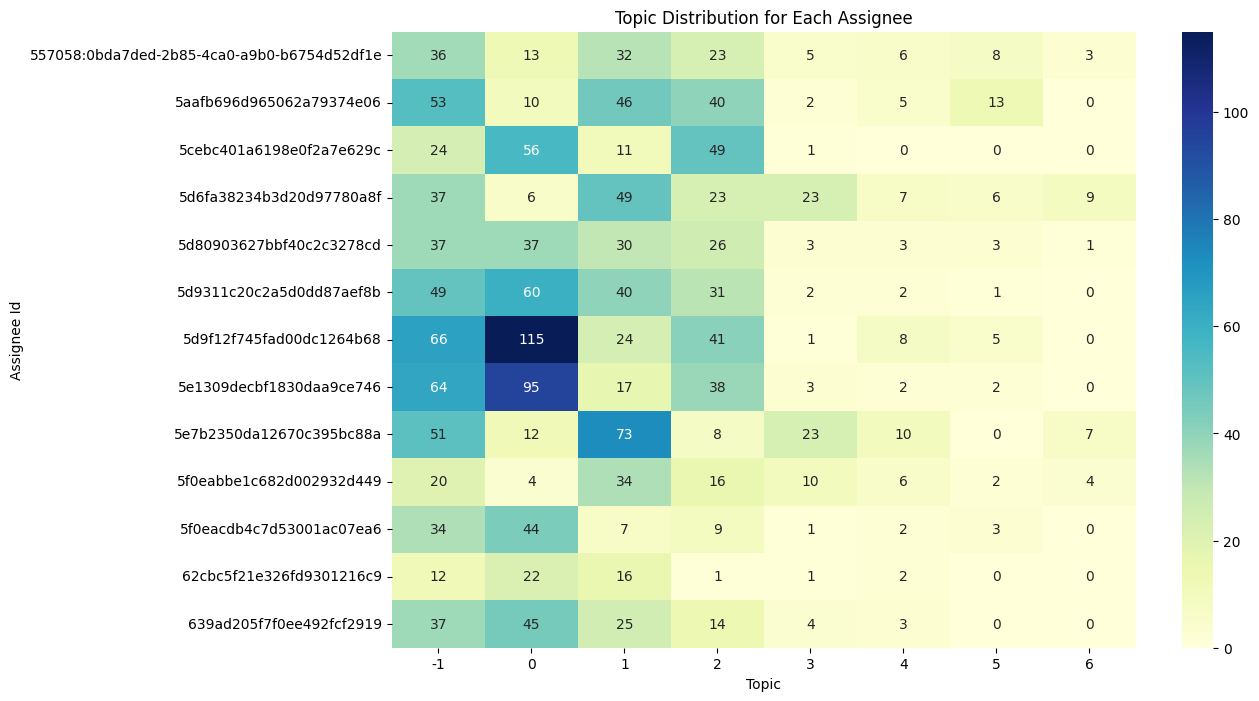

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
# 准备数据：按 Assignee 和 Topic 分组，并统计每个 Assignee 在每个 Topic 下的数量
topic_distribution = filtered_data.groupby(['Assignee Id', 'Topic']).size().unstack(fill_value=0)

# 使用Seaborn绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(topic_distribution, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Topic Distribution for Each Assignee")
plt.xlabel("Topic")
plt.ylabel("Assignee Id")
plt.show()

In [116]:
filtered_data[['Summary','Description','Issue id', 'Assignee Id', 'normalized_summary','normalized_description', 'Topic']].to_csv('/home/ryan/Downloads/data.csv', index=False)